In [18]:
import duckdb
import pandas as pd 
from pathlib import Path

# handling the path, i show where the database and sql file is 
duckdb_path = "../data/sakila.duckdb"
sql_load_path = "../sql/load_sakila.sql"

# Cleans old datafile if it exists, so thar we start a new every time
Path(duckdb_path).unlink(missing_ok = True)

# here i use the with statement to make sure the connection is closed after use
# i also  do the connection and the readiing of the sql file in the same line as Debbie did
# to ensure both are properly closed after use
with duckdb.connect(duckdb_path) as conn, open(sql_load_path, 'r') as ingest_script:
    # this runs the sql script that connects to the file 
    conn.execute(ingest_script.read())

    # This will import tables to pandas
    # also when the connection is open we can run sql queries, and also convert them to Pandas Data frames
    print("load the tables into memory")
    actor = conn.sql("SELECT * FROM actor").df()
    category = conn.sql("SELECT * FROM category").df()
    film = conn.sql("SELECT * FROM film").df()
    film_actor = conn.sql("SELECT * FROM film_actor").df()
    film_category = conn.sql("SELECT * FROM film_category").df()
    inventory = conn.sql("SELECT * FROM inventory").df()
    rental = conn.sql("SELECT * FROM rental").df()
    payment = conn.sql("SELECT * FROM payment").df()
    customer = conn.sql("SELECT * FROM customer").df()
    address = conn.sql("SELECT * FROM address").df()
    city = conn.sql("SELECT * FROM city").df()
    country = conn.sql("SELECT * FROM country").df()
    store = conn.sql("SELECT * FROM store").df()
    staff = conn.sql("SELECT * FROM staff").df()

#this verifies that the data has been loaded correctly by printing the first 5 rows of each table
# so that i can ensure myself that the data has been loaded correctly
print(" data has been loaded correctly,")

print(f"testing it out. First movie: {film['title'][0]}")






load the tables into memory
 data has been loaded correctly,
testing it out. First movie: ACADEMY DINOSAUR


In [2]:
# task 1a, 
print(" This is presenting the anwser: Movies longer than 3 hours")

# here i use duckdb to query the data directly for the variable film
# my choice of the where to be in minutes (180 minutes = 3 hours), is beacuse the length column is in minutes
movie_3h_plus = duckdb.sql("""
    SELECT title, length
    FROM film
    WHERE length > 180
    ORDER BY length DESC
""").df()
# this is so that the index starts with 1, souce: https://pandas.pydata.org/docs/reference/api/pandas.Index.html
movie_3h_plus.index = movie_3h_plus.index + 1 
print(movie_3h_plus)
    

 This is presenting the anwser: Movies longer than 3 hours
                 title  length
1         WORST BANGER     185
2        CHICAGO NORTH     185
3       CONTROL ANTHEM     185
4       DARN FORRESTER     185
5    SWEET BROTHERHOOD     185
6          GANGS PRIDE     185
7            HOME PITY     185
8   SOLDIERS EVOLUTION     185
9         POND SEATTLE     185
10       MUSCLE BRIGHT     185
11     MOONWALKER FOOL     184
12      THEORY MERMAID     184
13   CONSPIRACY SPIRIT     184
14    CRYSTAL BREAKING     184
15      SORORITY QUEEN     184
16      SONS INTERVIEW     184
17     SMOOCHY CONTROL     184
18      KING EVOLUTION     184
19      YOUNG LANGUAGE     183
20       SCALAWAG DUCK     183
21      FRONTIER CABIN     183
22       CATCH AMISTAD     183
23           WIFE TURN     183
24       MONSOON CAUSE     182
25       RECORDS ZORRO     182
26          REDS POCUS     182
27         SATURN NAME     182
28      SEARCHERS WAIT     182
29     BAKED CLEOPATRA     182
30       LO

In [3]:
#task 1b,
print(" This is presenting the movies that have the word love in title, also showing these columns: title, rating, length, description")

movie_title_love = duckdb.sql("""
    SELECT title, rating, length, description
    FROM film 
    WHERE title LIKE '%LOVE%'
    """).df()
# instead of just printing the results i use the display function to show the results in a more readable way
# Note: that LLM helped me with figuring out the display function, and now it looks much better 
movie_title_love.index = movie_title_love.index + 1
display(movie_title_love)




 This is presenting the movies that have the word love in title, also showing these columns: title, rating, length, description


,title,rating,length,description
1,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
2,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
3,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
4,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
5,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
6,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
7,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
8,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
9,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
10,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


In [4]:
# task 1b, 
# this is a nother way of doing this task, but here i only want to dispaly hte exakt word love!

print("This is presenting the movies that have the exact word love in title, also showing these columns: title, rating, length, description")

movie_title_love_exact = duckdb.sql("""
                                                                    
    SELECT title, rating, length, description
    FROM film
    WHERE title LIKE 'LOVE %'
    OR title LIKE '% LOVE %'
    OR title LIKE '% LOVE'
    OR title = 'LOVE'
    

""").df()
# in the query above i have used multiple conditions to ensure that only the exact word love is matched in the title
# the or functions help to cover different positions of the word love in the title
movie_title_love_exact.index = movie_title_love_exact.index + 1
display(movie_title_love_exact)


This is presenting the movies that have the exact word love in title, also showing these columns: title, rating, length, description


,title,rating,length,description
1,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
2,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...


In [5]:
# task 1c,
print(" This is presenting the the calculation on the length column, showing the shortest, longest and average movie length")
# here i i calculate the minimum , maximum and average length of the movies
length_calc_movie = duckdb.sql("""
    SELECT 
        MIN(length) as short_movie_stats,
        MAX(length) as long_movie_stats,
        MEDIAN(length) as median_length,
        AVG(length) as avg_movie_stats
    FROM film
    """).df()
# here again i use the display function for a more readble output
# i even was able to round the average value with the round function
length_calc_movie.index = length_calc_movie.index + 1
display(round(length_calc_movie))

 This is presenting the the calculation on the length column, showing the shortest, longest and average movie length


,short_movie_stats,long_movie_stats,median_length,avg_movie_stats
1,46,185,114.0,115.0


In [6]:
# task 1d,
print(" This will represent the Top 10 most expensive movies to rent per day (rental Rates)")
# here what i did os select all needed columns,
# then i divieded the rental rate with the rental duration, 
# As the alias cost_per_day
most_expensive_movies = duckdb.sql("""
    SELECT  
    title,
    rental_rate,
    rental_duration,
    (rental_rate / rental_duration) as cost_per_day
FROM film 
ORDER BY cost_per_day DESC
LIMIT 10

                                   
    
     """).df()

most_expensive_movies.index = most_expensive_movies.index + 1
display(most_expensive_movies)

 This will represent the Top 10 most expensive movies to rent per day (rental Rates)


,title,rental_rate,rental_duration,cost_per_day
1,BACKLASH UNDEFEATED,4.99,3,1.663333
2,BILKO ANONYMOUS,4.99,3,1.663333
3,BEAST HUNCHBACK,4.99,3,1.663333
4,AUTUMN CROW,4.99,3,1.663333
5,ACE GOLDFINGER,4.99,3,1.663333
6,CARIBBEAN LIBERTY,4.99,3,1.663333
7,BEHAVIOR RUNAWAY,4.99,3,1.663333
8,CASPER DRAGONFLY,4.99,3,1.663333
9,AMERICAN CIRCUS,4.99,3,1.663333
10,CASUALTIES ENCINO,4.99,3,1.663333


In [7]:
# Task 1e
print(" This represents the actors that have played in most movies, and is displaying the top 10")
#  get the first name and last name from the actor table. And i give it tha alias (a)
# i then did a JOIN, and this is so that i put together the right actor with the right movie via the ID. 
# What i then did is use GROUP BY so i can count the amount per person.

actors_most_movies = duckdb.sql("""
SELECT 
    a.first_name,
    a.last_name,
    COUNT(fa.film_id) as movie_counter
FROM actor a
JOIN film_actor fa ON a.actor_id = fa.actor_id
GROUP BY a.actor_id, a.first_name, a.last_name
ORDER BY movie_counter DESC
LIMIT 10
""").df()

actors_most_movies.index = actors_most_movies.index + 1
display(actors_most_movies)

 This represents the actors that have played in most movies, and is displaying the top 10


,first_name,last_name,movie_counter
1,GINA,DEGENERES,42
2,WALTER,TORN,41
3,MARY,KEITEL,40
4,MATTHEW,CARREY,39
5,SANDRA,KILMER,37
6,SCARLETT,DAMON,36
7,VAL,BOLGER,35
8,ANGELA,WITHERSPOON,35
9,UMA,WOOD,35
10,GROUCHO,DUNST,35


## 1f 
### In this part i will be woking on my own questions
1. What movies generates the most money in total?
2. What movie has the most copies in stock?
3. What months had the highedt sales?
4.  what rating has the most rental price 

In [8]:
# 1. 
print("What movies generates the most money in total?(Top 5)")
# here i will be joining film, inventory, rental and payment 
# this is needed so that i may get what movie has the most total revenue
# i use SUM so that i can get all the payments per movie title 

highest_revenue = duckdb.sql("""
    SELECT
        f.title,
        SUM(p.amount) AS total_revenue
FROM film f
JOIN inventory i ON f.film_id = i.film_id
JOIN rental r ON i.inventory_id = r.inventory_id
JOIN payment p ON r.rental_id = p.rental_id
GROUP BY f.title
ORDER BY total_revenue DESC
LIMIT 5
""").df()

highest_revenue.index = highest_revenue.index + 1
display(highest_revenue)

What movies generates the most money in total?(Top 5)


,title,total_revenue
1,TELEGRAPH VOYAGE,231.73
2,WIFE TURN,223.69
3,ZORRO ARK,214.69
4,GOODFELLAS SALUTE,209.69
5,SATURDAY LAMBS,204.72


In [9]:
# 2
print("What movie has the most copies in stock?(Top 5)")
# Here i will be finding out what movie has the most copies in stock 
# by joining film and inventory to count how many inventoty_ids exists for every film title 
# This will give us the movie with the most copies in the store 

most_movies_stock = duckdb.sql("""
    SELECT
        f.title,
        COUNT(i.inventory_id) AS stock_count
    FROM film f
    JOIN inventory i ON f.film_id = i.film_id
    GROUP BY f.title
    ORDER BY stock_count DESC    
    LIMIT 5
                                                                                

    
    

""").df()
most_movies_stock.index = most_movies_stock.index + 1
display(most_movies_stock)

What movie has the most copies in stock?(Top 5)


,title,stock_count
1,BOUND CHEAPER,8
2,BUTTERFLY CHOCOLAT,8
3,CROSSROADS CASUALTIES,8
4,DEER VIRGINIAN,8
5,EXPENDABLE STALLION,8


In [10]:
#3
print("What months had the highest sales?")
# Here i will be using the MONTH function to group it by month, using the payment_date
# With the SUM I WILL BE summing the amount to see what month hade the most revenue 

most_revenue_month = duckdb.sql("""
    SELECT
        MONTH(payment_date) AS month_number,
        SUM(amount) AS all_sales 
    FROM payment
    GROUP BY month_number 
    ORDER BY all_sales DESC
                                
        

""").df()

most_revenue_month.index = most_revenue_month.index + 1
display(round(most_revenue_month))


What months had the highest sales?


,month_number,all_sales
1,7,28374.0
2,8,24072.0
3,6,9632.0
4,5,4824.0
5,2,514.0


In [11]:
#4 
print("what rating has the most rental price")
# I am going to be grouping by the rating, and calculating the average rentale rate
# This is so that we can see if some age ratings cost more then others on average

price_rating = duckdb.sql("""
    SELECT
        rating,
        AVG(rental_rate) AS avg_price
    FROM film
    GROUP BY rating 
    ORDER BY avg_price DESC
""").df()

price_rating.index = price_rating.index + 1
display((price_rating))

what rating has the most rental price


,rating,avg_price
1,PG,3.051856
2,PG-13,3.034843
3,NC-17,2.970952
4,R,2.938718
5,G,2.888876


In [ ]:
import matplotlib.pyplot as plt 

print("Matplotlib imported!")


Matplotlib imported succsessfully!


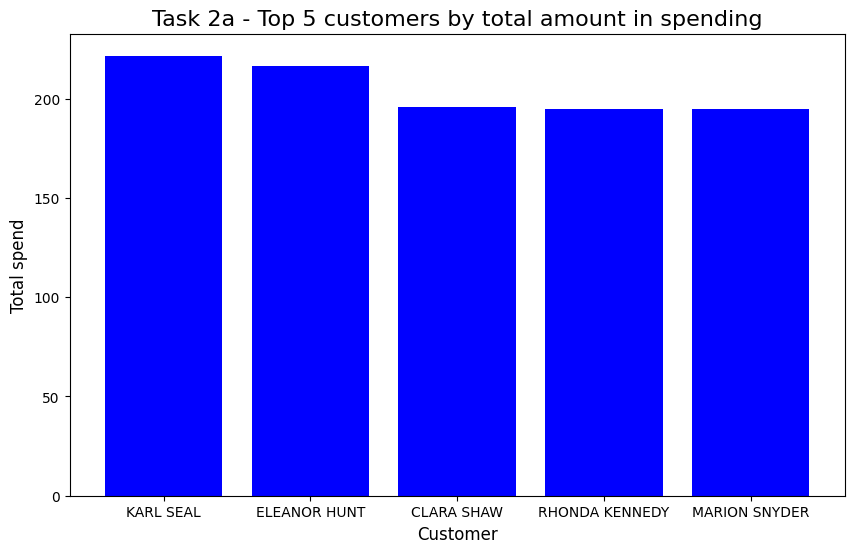

In [23]:
# Task 2a

# This is getting the data
# Here i join customer and payment tables
# I do this so that i can get the sum of payments per customer

most_spendning_customers = duckdb.sql("""
    SELECT
        c.first_name || ' ' || c.last_name as customer_name,
        SUM(p.amount) as total_spending 
    FROM customer c
    JOIN payment p ON c.customer_id = p.customer_id
    GROUP BY customer_name
    ORDER BY total_spending DESC
    LIMIT 5
                                      
""").df()

most_spendning_customers.index = most_spendning_customers.index + 1
# here i create a bar chart for visualization 
plt.figure(figsize = (10, 6))
plt.bar(most_spendning_customers['customer_name'], most_spendning_customers['total_spending'], color = 'blue')
plt.title('Task 2a - Top 5 customers by total amount in spending', fontsize = 16)
plt.xlabel('Customer', fontsize = 12)
plt.ylabel('Total spend', fontsize = 12)
plt.show()





